In [1]:
from useful import *
from discrete_quantum import *
from numpy import empty, arange
import numpy as np
from timeit import *

from unipolator import *

from iplots import *
import matplotlib.pyplot as plt

In [2]:
%load_ext Cython

In [3]:
%%cython
# import numpy as np
cimport numpy as np
np.import_array()  # Call this to access cythons api for ndarrays
cimport cython

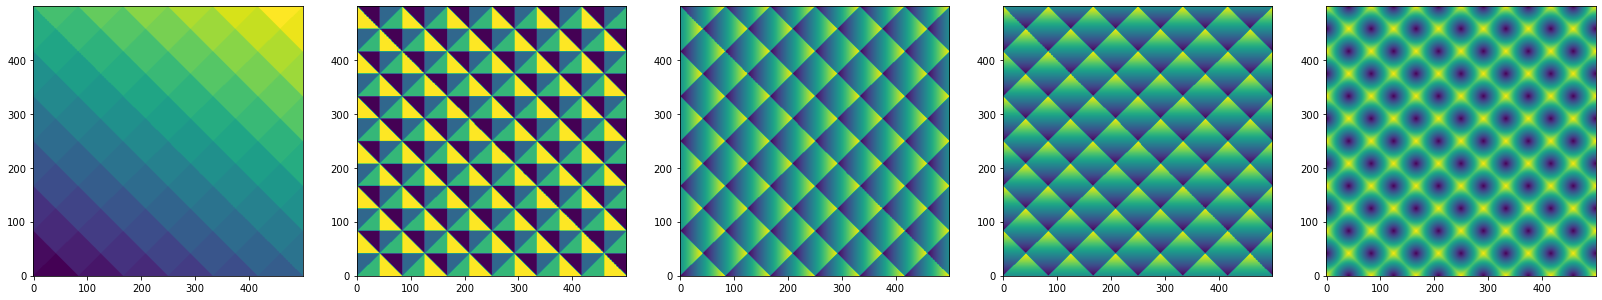

In [4]:
n = 3
s = 2
bins = 12
H_s = np.empty([n,s,s], dtype=np.complex128)
for i in range(n):
    H_s[i,:,:] = randH(s)
    
c_mins = np.zeros(n-1, dtype=np.double)
c_maxs = np.ones(n-1, dtype=np.double)
c_bins = bins*np.ones(n-1, dtype=int)
ui = UI(H_s, c_mins, c_maxs, c_bins)

how_many = 500
c_s = np.linspace(0,1,how_many)
L = np.empty([how_many,how_many,n-1],dtype=int)
dL = np.empty([how_many,how_many,n-1], dtype=int)
alpha = np.empty([how_many,how_many,n-1], dtype=np.double)
C = np.empty([how_many,how_many], dtype=np.double)
for i, d in enumerate(c_s):
    for j, e in enumerate(c_s):
        c = np.array([d,e]) #np.random.random(n-1)
        L[i,j,:], dL[i,j,:], alpha[i,j,:] = ui.get_single_param(c)
        C[i,j] = np.sqrt(sum(alpha[i,j,:]**2))
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(28,7))
ax1.imshow(2*L[:,:,1].T+L[:,:,0].T, origin='lower')
ax2.imshow(2*dL[:,:,1].T+dL[:,:,0].T, origin='lower')
ax3.imshow(alpha[:,:,0].T*(1/2+dL[:,:,0].T)*2, origin='lower')
ax4.imshow(alpha[:,:,1].T*(1/2+dL[:,:,1].T)*2, origin='lower')
ax5.imshow(C.T, origin='lower')
plt.show()

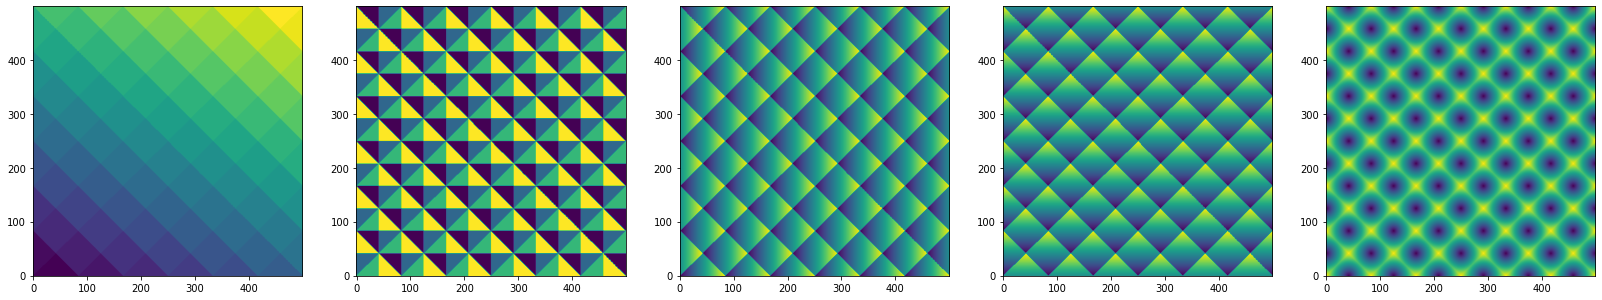

In [6]:
import unipolator_old as ui_old
n = 3
s = 2
bins = 12
H_s = np.empty([n,s,s], dtype=np.complex128)
for i in range(n):
    H_s[i,:,:] = randH(s)
    
c_mins = np.zeros(n-1, dtype=np.double)
c_maxs = np.ones(n-1, dtype=np.double)
c_bins = bins*np.ones(n-1, dtype=int)
c0s = array([c_mins, c_maxs/bins])


how_many = 500
c_s = np.linspace(0,1,how_many)
oL = np.empty([how_many,how_many,n-1],dtype=int)
odL = np.empty([how_many,how_many,n-1], dtype=int)
oalpha = np.empty([how_many,how_many,n-1], dtype=np.double)
oC = np.empty([how_many,how_many], dtype=np.double)
for i, d in enumerate(c_s):
    for j, e in enumerate(c_s):
        c = np.array([d,e]) #np.random.random(n-1)
        oL[i,j,:], oalpha[i,j,:], odL[i,j,:] = ui_old.Parameters2OddGrid(c, c0s, c_bins)
        oC[i,j] = np.sqrt(sum(alpha[i,j,:]**2))
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(28,7))
ax1.imshow(2*oL[:,:,1].T+oL[:,:,0].T, origin='lower')
ax2.imshow(2*odL[:,:,1].T+odL[:,:,0].T, origin='lower')
ax3.imshow(oalpha[:,:,0].T*(1/2+dL[:,:,0].T)*2, origin='lower')
ax4.imshow(oalpha[:,:,1].T*(1/2+dL[:,:,1].T)*2, origin='lower')
ax5.imshow(oC.T, origin='lower')
plt.show()

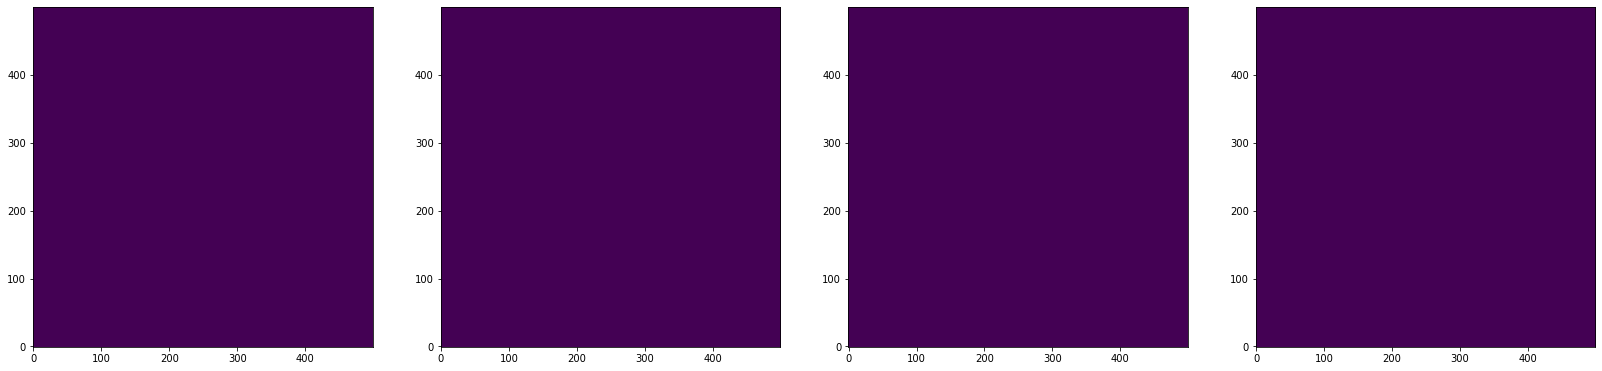

In [7]:
#Compare results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28,7))
ax1.imshow(oL[:,:,1].T-L[:,:,1].T, origin='lower')
ax2.imshow(oL[:,:,0].T-L[:,:,0].T, origin='lower')
ax3.imshow(odL[:,:,1].T-dL[:,:,1].T, origin='lower')
ax4.imshow(odL[:,:,0].T-dL[:,:,0].T, origin='lower')

In [8]:
# Test the grid creation algorithms, compare them
dcs = c0s[1,:]
oU_grid, ogrid_cum_sum = ui_old.Create_Unitary_Grid(c0s, c_bins, H_s)
U_grid, cum_prod = Unitary_Grid(H_s, c_mins, dcs, c_bins)

print(max(U_grid-oU_grid))
print(ogrid_cum_sum-cum_prod)

(7.771561172376096e-16+5.551115123125783e-16j)
[0 0]


In [9]:
# Test cache creation
E, Vl, Vr, CL, CH, strides_E, strides_L, strides_R, strides_C, first_elements_E, first_elements_C = Create_Interpolation_Cache( U_grid, cum_prod, c_bins)
oEr, oE, oVl, oVr, oCL, oCH, osE, osL, osR, osC = ui_old.Create_Interpolation_Cache(oU_grid, ogrid_cum_sum, c_bins)

print(mabs(oEr-E[:first_elements_E[1],:]))
print(mabs(oE[0]-E[first_elements_E[1]:,:]))
print(mabs(Vl-oVl))
print(mabs(Vr-oVr))
print(mabs(CL-oCL[0]))
print(mabs(CH-oCH[0]))

1.1379786002407855e-15
9.159339953157541e-16
4.277947340025217e-14
1.2989609388114332e-14
3.979278457092647e-14
3.395150514218378e-14


In [5]:
#strides_E, strides_L, strides_R, strides_C, first_elements_E, first_elements_C
#osE, osL, osR, osC
for a, b in zip([strides_E, strides_L, strides_R, strides_C ], [osE, osL, osR, osC]):
    print(np.asarray(a))
    for bs in b:
        print(bs)
    line()

NameError: name 'strides_E' is not defined